# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = json.load(open('data.json'))

In [3]:
solutions = pd.read_csv('Solutions.csv')

# Recurrence Relations

In [4]:
from sequences.linear_recurrence_relations import *

## 10th - 1st (GP) Order Sequences

Solving 10 order


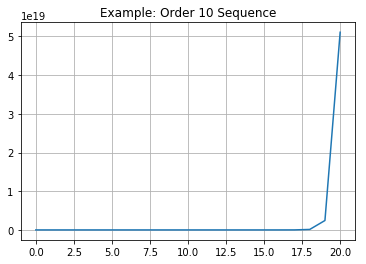


Solved order 10: 17733 (8.04%)
Solving 9 order


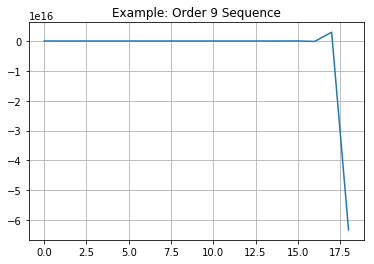


Solved order 9: 20983 (9.51%)
Solving 8 order


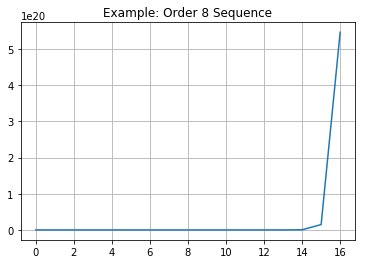


Solved order 8: 23093 (10.47%)
Solving 7 order


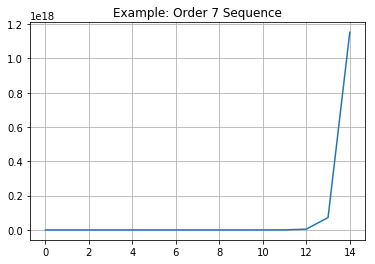


Solved order 7: 22581 (10.24%)
Solving 6 order


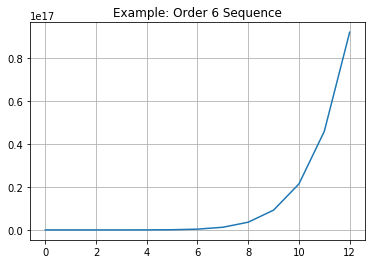


Solved order 6: 20374 (9.24%)
Solving 5 order


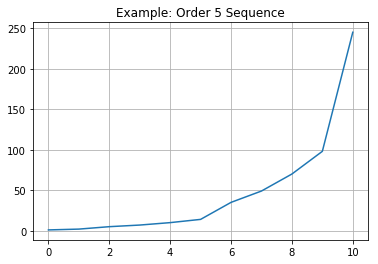


Solved order 5: 18243 (8.27%)
Solving 4 order


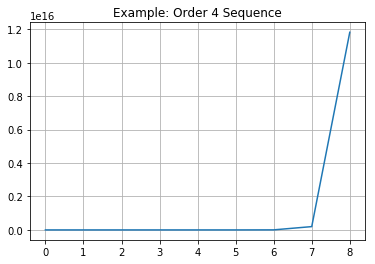


Solved order 4: 17121 (7.76%)
Solving 3 order


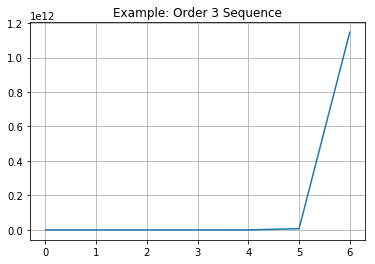


Solved order 3: 14964 (6.78%)
Solving 2 order


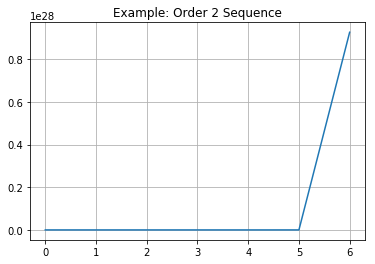


Solved order 2: 9241 (4.19%)
Solving 1 order


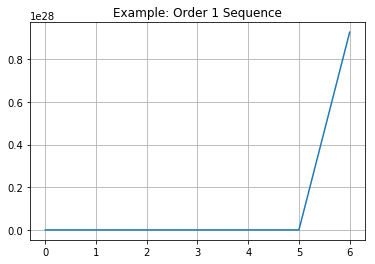


Solved order 1: 1644 (0.75%)


In [5]:
for order in range(10, 0, -1):
    print(f'Solving {order} order')
    solutions[f'r{order}'] = 0
    count = 0
    for i in trange(len(data)):
        seq = data[i]
        coeff = checkRecurrence(seq,order)
        if coeff:
            count += 1
            solutions.loc[i, 'Solved'] = 1
            solutions.loc[i, f'r{order}'] = 1
            if count == 1:
                fig, ax = plt.subplots()
                ax.plot(seq)
                ax.grid()
                ax.set_title(f'Example: Order {order} Sequence')
                plt.show()

    print(f'Solved order {order}: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [6]:
solutions.drop(['Id'], axis=1).mean(0).mul(100).round(2).astype(str) + '%'

Solved    29.04%
r10        8.04%
r9         9.51%
r8        10.47%
r7        10.24%
r6         9.24%
r5         8.27%
r4         7.76%
r3         6.78%
r2         4.19%
r1         0.75%
dtype: object

In [7]:
print('linear recurrence relations', round(solutions[[f'r{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')

linear recurrence relations 29.04 %


In [8]:
solutions.to_csv('Solutions.csv', index=False)